**Connecting to Drive**

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing library**

In [70]:
import json
import gzip
import pandas as pd

**Creating the Dataframe on the basis on selected producted**

In [71]:
asin_set = set()
def read_metadata_from_gzip(gzip_file_path):
    try:
        with gzip.open(gzip_file_path, 'rt') as file:
            for line in file:
                yield json.loads(line)
    except Exception as e:
        print("Error reading gzip file:", e)

def search_word_in_metadata(metadata, word):
    meta_data = []
    for item in metadata:
        if isinstance(item['title'], str) and word in item['title'].lower():
            asin = item.get('asin')
            if asin not in asin_set:
                asin_set.add(asin)
                meta_data.append(item)
                print(item['title'])
    return meta_data

def metadata_collection():
    gzip_file_path = '/content/drive/MyDrive/IR_Assignment_3/meta_Electronics.json.gz'
    word = input("Enter the word to search for: ")

    meta_data = []
    for item in read_metadata_from_gzip(gzip_file_path):
        meta_data.extend(search_word_in_metadata([item], word))  # Pass the entire metadata set

    if meta_data:
        print("Word found in the following items:")
        df = pd.DataFrame(meta_data)
        print(df.shape)
        df.to_csv('meta_data.csv', index=False, escapechar='\\')
        print("Data saved to meta_data.csv")
    else:
        print("Word not found in meta_data any items.")

In [72]:
metadata_collection()

Streaming output truncated to the last 5000 lines.
CorlfulCase174; 17&quot; 17.3&quot; inch Laptop Bag Notebook Case Sleeve (Can Be use as Mousepad) For APPLE MACBOOK PRO 17/Toshiba Qosmio 17/Dell Alienware 17/MSI GS70 Stealth Pro/MSI GT70 Dominator Pro/Sager Cleo x7200/ASUS ROG G750 - Zebra B17-5009
CorlfulCase&reg; 17&quot; 17.3&quot; inch Laptop Bag Notebook Case Sleeve (Can Be use as Mousepad) For APPLE MACBOOK PRO 17/Toshiba Qosmio 17/Dell Alienware 17/MSI GS70 Stealth Pro/MSI GT70 Dominator Pro/Sager Cleo x7200/ASUS ROG G750 - Many Tree B17-19548
CorlfulCase174; 17&quot; 17.3&quot; inch Laptop Bag Notebook Case Sleeve (Can Be use as Mousepad) For APPLE MACBOOK PRO 17/Toshiba Qosmio 17/Dell Alienware 17/MSI GS70 Stealth Pro/MSI GT70 Dominator Pro/Sager Cleo x7200/ASUS ROG G750 - Blue Fairy B17-42790
CorlfulCase174; 17&quot; 17.3&quot; inch Laptop Bag Notebook Case Sleeve (Can Be use as Mousepad) with Hidden Handle For APPLE MACBOOK PRO 17/Toshiba Qosmio 17/Dell Alienware 17/MSI GS

In [73]:
meta_data = pd.read_csv("/content/meta_data.csv")
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8698 entries, 0 to 8697
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   category         8698 non-null   object 
 1   tech1            2364 non-null   object 
 2   description      8698 non-null   object 
 3   fit              0 non-null      float64
 4   title            8698 non-null   object 
 5   also_buy         8698 non-null   object 
 6   tech2            672 non-null    object 
 7   brand            8632 non-null   object 
 8   feature          8698 non-null   object 
 9   rank             8698 non-null   object 
 10  also_view        8698 non-null   object 
 11  main_cat         8674 non-null   object 
 12  similar_item     2402 non-null   object 
 13  date             8120 non-null   object 
 14  price            2360 non-null   object 
 15  asin             8698 non-null   object 
 16  imageURL         8698 non-null   object 
 17  imageURLHighRe

In [74]:
print(meta_data)

                                               category tech1  \
0     ['Electronics', 'Computers &amp; Accessories',...   NaN   
1     ['Electronics', 'Computers &amp; Accessories',...   NaN   
2     ['Electronics', 'Computers &amp; Accessories',...   NaN   
3     ['Electronics', 'Computers &amp; Accessories',...   NaN   
4     ['Electronics', 'Accessories & Supplies', 'Aud...   NaN   
...                                                 ...   ...   
8693  ['Electronics', 'Computers & Accessories', 'Co...   NaN   
8694  ['Electronics', 'Computers & Accessories', 'Co...   NaN   
8695  ['Electronics', 'Computers & Accessories', 'Ta...   NaN   
8696  ['Electronics', 'Computers & Accessories', 'La...   NaN   
8697  ['Electronics', 'Computers & Accessories', 'Co...   NaN   

                                            description  fit  \
0     ['Introduction:\\n Wonderful optical mouse. Lo...  NaN   
1     ['', '.<br /> .<br /> .<br /> Replacement USB ...  NaN   
2     ['Cellet 32GB Samsung

**# Remove Duplicates in 'asin' column**

In [75]:
# Remove Duplicates in 'asin' column
meta_data.drop_duplicates(subset='asin', inplace=True)

# Print first few rows of preprocessed dataset
print(meta_data.head())

                                            category tech1  \
0  ['Electronics', 'Computers &amp; Accessories',...   NaN   
1  ['Electronics', 'Computers &amp; Accessories',...   NaN   
2  ['Electronics', 'Computers &amp; Accessories',...   NaN   
3  ['Electronics', 'Computers &amp; Accessories',...   NaN   
4  ['Electronics', 'Accessories & Supplies', 'Aud...   NaN   

                                         description  fit  \
0  ['Introduction:\\n Wonderful optical mouse. Lo...  NaN   
1  ['', '.<br /> .<br /> .<br /> Replacement USB ...  NaN   
2  ['Cellet 32GB Samsung Omnia Pro 5 Micro SDHC C...  NaN   
3  ['MOUSE ADAPTER SERIAL TO PS/2', 'Combination ...  NaN   
4  ['MOUSE - PS/2 TO SERIAL ADAPTER', 'Combinatio...  NaN   

                                               title  \
0  Cute Car Shape 2.4GHz USB Receiver Mice Wirele...   
1  USB Female to Ps2 PS/2 Male Mouse Keyboard Pc ...   
2        Arty mouse palabras: Limpia y vuelve a usar   
3  Belkin F4A611 Serial to PS/2 Mous

In [76]:
product_id =set(meta_data['asin'])
print(len(product_id))

8698


**Report the total number of rows for the product**

In [77]:
total_rows = meta_data.shape[0]
print("Total number of rows for the product:", total_rows)

Total number of rows for the product: 8698


**Descriptive Statistics of the product mouse: -**

In [78]:
def read_json_gzip(file_path):
    with gzip.open(file_path, 'rt') as file:
        for line in file:
            yield json.loads(line)

def read(file_path):
    vote_list = []
    # Iterate through each JSON object in the gzip-compressed file
    for data in read_json_gzip(file_path):
       if data.get('asin') in product_id:
        asin.add(data.get('asin'))
        vote_value = data.get('overall')
        if vote_value is not None:
            # Convert the vote value to an integer
            vote = int(vote_value)
            vote_list.append(vote)
    return vote_list


asin = set()
file_path = '/content/drive/MyDrive/IR_Assignment_3/Electronics_5.json.gz'
vote_list = read(file_path)

count_1 = 0
count_2 = 0
count_3 = 0
count_4 = 0
count_5 = 0

for rating in vote_list:
    if rating == 5:
        count_5 += 1
    elif rating == 4:
        count_4 += 1
    elif rating == 3:
        count_3 += 1
    elif rating == 2:
        count_2 += 1
    elif rating == 1:
        count_1 += 1

count_good = count_4 + count_5
count_bad = count_1 + count_2 + count_3

# Define the DataFrame before calculating average_value
df = pd.DataFrame({'overall': vote_list})
average_value = df['overall'].mean(skipna=False)

print("Total number of reviews:", len(vote_list))
print("Average Rating Score:", average_value)
print("Number of Good Ratings:", count_good)
print("Number of Bad Ratings:", count_bad)
print("Number of ratings corresponding to 5:", count_5)
print("Number of ratings corresponding to 4:", count_4)
print("Number of ratings corresponding to 3:", count_3)
print("Number of ratings corresponding to 2:", count_2)
print("Number of ratings corresponding to 1:", count_1)

Total number of reviews: 151443
Average Rating Score: 4.172777876824944
Number of Good Ratings: 117812
Number of Bad Ratings: 33631
Number of ratings corresponding to 5: 91146
Number of ratings corresponding to 4: 26666
Number of ratings corresponding to 3: 13454
Number of ratings corresponding to 2: 9005
Number of ratings corresponding to 1: 11172



**5. Preprocess the Text**



In [79]:
import pandas as pd
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


# Function to remove HTML tags
def remove_html_tags(text):
    clean_text = re.sub(r'<.*?>', '', text)
    return clean_text

# Function to remove accented characters
def remove_accented_chars(text):
    clean_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return clean_text

# Function to expand acronyms
def expand_acronyms(text):
    # Define your own dictionary of acronyms and their expansions
    acronym_dict = {
        'lol': 'laugh out loud',
        'brb': 'be right back',
        # Add more acronyms and expansions as needed
    }
    # Replace acronyms with their expansions
    for acronym, expansion in acronym_dict.items():
        text = text.replace(acronym, expansion)
    return text

# Function to remove special characters
def remove_special_characters(text):
    clean_text = re.sub(r'[^a-zA-Z\s]', '', text)
    return clean_text

# Function for lemmatization
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokenized_text = word_tokenize(text)
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in tokenized_text])
    return lemmatized_text

# Function for text normalization
def normalize_text(text):
    # Convert text to lowercase
    normalized_text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    normalized_text = ' '.join(word for word in normalized_text.split() if word not in stop_words)
    return normalized_text

# Apply text preprocessing steps to the 'title' column
meta_data['title'] = meta_data['title'].apply(lambda x: x.lower())  # Convert text to lowercase
meta_data['title'] = meta_data['title'].apply(lambda x: remove_html_tags(x))
meta_data['title'] = meta_data['title'].apply(lambda x: remove_accented_chars(x))
meta_data['title'] = meta_data['title'].apply(lambda x: expand_acronyms(x))
meta_data['title'] = meta_data['title'].apply(lambda x: remove_special_characters(x))
meta_data['title'] = meta_data['title'].apply(lambda x: lemmatize_text(x))
meta_data['title'] = meta_data['title'].apply(lambda x: normalize_text(x))

# Print first few rows of preprocessed dataset
print(meta_data.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                            category tech1  \
0  ['Electronics', 'Computers &amp; Accessories',...   NaN   
1  ['Electronics', 'Computers &amp; Accessories',...   NaN   
2  ['Electronics', 'Computers &amp; Accessories',...   NaN   
3  ['Electronics', 'Computers &amp; Accessories',...   NaN   
4  ['Electronics', 'Accessories & Supplies', 'Aud...   NaN   

                                         description  fit  \
0  ['Introduction:\\n Wonderful optical mouse. Lo...  NaN   
1  ['', '.<br /> .<br /> .<br /> Replacement USB ...  NaN   
2  ['Cellet 32GB Samsung Omnia Pro 5 Micro SDHC C...  NaN   
3  ['MOUSE ADAPTER SERIAL TO PS/2', 'Combination ...  NaN   
4  ['MOUSE - PS/2 TO SERIAL ADAPTER', 'Combinatio...  NaN   

                                               title  \
0  cute car shape ghz usb receiver mouse wireless...   
1  usb female p p male mouse keyboard pc computer...   
2             arty mouse palabras limpia vuelve usar   
3  belkin fa serial p mouse adapter 

**create a datframe for this for Review**

In [ ]:
def read_json_gzip(file_path):
    with gzip.open(file_path, 'rt') as file:
        for line in file:
            yield json.loads(line)

def read(file_path, product_id):
    data_list = []
    for data in read_json_gzip(file_path):
        if data.get('asin') in product_id:
            data_list.append(data)
    return data_list

file_path = '/content/drive/MyDrive/IR_Assignment_3/Electronics_5.json.gz'
data_list = read(file_path, product_id)

# Create DataFrame
Review_data= pd.DataFrame(data_list)

# Display DataFrame
print(Review_data)

In [134]:
Review_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151378 entries, 0 to 151442
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   overall         151378 non-null  float64       
 1   verified        151378 non-null  bool          
 2   reviewTime      151378 non-null  datetime64[ns]
 3   reviewerID      151378 non-null  object        
 4   asin            151378 non-null  object        
 5   reviewerName    151378 non-null  object        
 6   reviewText      151378 non-null  object        
 7   summary         151378 non-null  object        
 8   unixReviewTime  151378 non-null  int64         
 9   vote            12142 non-null   object        
 10  style           77574 non-null   object        
 11  image           1884 non-null    object        
 12  year            151378 non-null  int32         
dtypes: bool(1), datetime64[ns](1), float64(1), int32(1), int64(1), object(8)
memory usage: 14.6+ M

**Text preprocessing on it and handle missing value**

In [81]:
import pandas as pd
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer



# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Function to remove HTML tags
def remove_html_tags(text):
    clean_text = re.sub(r'<.*?>', '', text)
    return clean_text

# Function to remove accented characters
def remove_accented_chars(text):
    clean_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return clean_text

# Function to expand acronyms
def expand_acronyms(text):
    # Define your own dictionary of acronyms and their expansions
    acronym_dict = {
        'lol': 'laugh out loud',
        'brb': 'be right back',
        # Add more acronyms and expansions as needed
    }
    # Replace acronyms with their expansions
    for acronym, expansion in acronym_dict.items():
        text = text.replace(acronym, expansion)
    return text

# Function to remove special characters
def remove_special_characters(text):
    clean_text = re.sub(r'[^a-zA-Z\s]', '', text)
    return clean_text

# Function for lemmatization
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokenized_text = word_tokenize(text)
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in tokenized_text])
    return lemmatized_text

# Function for text normalization
def normalize_text(text):
    # Convert text to lowercase
    normalized_text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    normalized_text = ' '.join(word for word in normalized_text.split() if word not in stop_words)
    return normalized_text

# Apply text preprocessing steps to the specified columns
columns_to_preprocess = ['reviewText', 'summary', 'reviewerName']
for col in columns_to_preprocess:
    Review_data[col] = Review_data[col].fillna('').astype(str)  # Handle NaN values
    Review_data = Review_data[Review_data[col] != '']  # Drop rows with empty strings
    Review_data = Review_data.dropna(subset=[col])  # Drop rows with NaN values in specified column
    Review_data[col] = Review_data[col].apply(lambda x: x.lower())  # Convert text to lowercase
    Review_data[col] = Review_data[col].apply(lambda x: remove_html_tags(x))
    Review_data[col] = Review_data[col].apply(lambda x: remove_accented_chars(x))
    Review_data[col] = Review_data[col].apply(lambda x: expand_acronyms(x))
    Review_data[col] = Review_data[col].apply(lambda x: remove_special_characters(x))
    Review_data[col] = Review_data[col].apply(lambda x: lemmatize_text(x))
    Review_data[col] = Review_data[col].apply(lambda x: normalize_text(x))

# Print first few rows of preprocessed dataset
print(Review_data.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


   overall  verified   reviewTime      reviewerID        asin  \
0      4.0      True   12 7, 2016   AGO3EP72GI419  9803751263   
1      3.0      True  10 10, 2016   AP7M2KXPIYESM  9803751263   
2      1.0      True   09 9, 2016  A279EPILDCGV5T  9803751263   
3      1.0      True  06 25, 2016   AIGLYVT5UYXD8  9803751263   
4      4.0      True   12 6, 2017  A3MUW5YHOGREQU  9803751263   

      reviewerName                                         reviewText  \
0  amazon customer                                      work expected   
1  johnny hastings                      still need old type mouse usb   
2       galaxy one  doe work keyboard mouse using hp computer runn...   
3          charles  work plugged p port mb plugged usb mouse keybo...   
4      susan silva                               one worked one didnt   

          summary  unixReviewTime vote style image  
0   work expected      1481068800  NaN   NaN   NaN  
1             usb      1476057600  NaN   NaN   NaN  
2  worksave

In [82]:
len(Review_data["asin"])

151378

**Stactical analysis of data**

In [83]:
def read_dataframe(df):
    vote_list = []
    asin = set()
    for index, row in df.iterrows():
        if row['asin'] in product_id:
            asin.add(row['asin'])
            vote_value = row['overall']
            if not pd.isnull(vote_value):
                # Convert the vote value to an integer
                vote = int(vote_value)
                vote_list.append(vote)
    return vote_list, asin

vote_list, asin = read_dataframe(Review_data)

count_1 = 0
count_2 = 0
count_3 = 0
count_4 = 0
count_5 = 0

for rating in vote_list:
    if rating == 5:
        count_5 += 1
    elif rating == 4:
        count_4 += 1
    elif rating == 3:
        count_3 += 1
    elif rating == 2:
        count_2 += 1
    elif rating == 1:
        count_1 += 1

count_good = count_4 + count_5
count_bad = count_1 + count_2 + count_3

# Define the DataFrame before calculating average_value
df = pd.DataFrame({'overall': vote_list})
average_value = df['overall'].mean(skipna=False)

print("Total number of reviews:", len(vote_list))
print("Average Rating Score:", average_value)
print("Number of Good Ratings:", count_good)
print("Number of Bad Ratings:", count_bad)
print("Number of ratings corresponding to 5:", count_5)
print("Number of ratings corresponding to 4:", count_4)
print("Number of ratings corresponding to 3:", count_3)
print("Number of ratings corresponding to 2:", count_2)
print("Number of ratings corresponding to 1:", count_1)


Total number of reviews: 151378
Average Rating Score: 4.172719946095206
Number of Good Ratings: 117762
Number of Bad Ratings: 33616
Number of ratings corresponding to 5: 91104
Number of ratings corresponding to 4: 26658
Number of ratings corresponding to 3: 13445
Number of ratings corresponding to 2: 9000
Number of ratings corresponding to 1: 11171


**6. To extract relevant statistics, perform the following EDA -**
a. Top 20 most reviewed brands in the category that you have chosen.

In [84]:
# Import necessary libraries
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming your two dataframes are named df1 and df2

# Task a: Top 20 most reviewed brands
top_20_most_reviewed = meta_data['brand'].value_counts().head(20)

# Task b: Top 20 least reviewed brands
top_20_least_reviewed = meta_data['brand'].value_counts().tail(20)

In [85]:
top_20_most_reviewed

brand
Logitech             548
Microsoft            283
TOP CASE             250
HP                   189
Dell                 155
Generic              149
Kensington           137
Road Mice             91
Gear Head             85
Targus                85
Cooper Cases          76
Rapoo                 74
Amsahr                70
iHome                 63
Best Deal             63
Lenovo                61
Micro Innovations     57
Belkin                56
Sony                  52
Perman                46
Name: count, dtype: int64

**Top 20 least reviewed brands in the category you have chosen.**

In [86]:
top_20_least_reviewed

brand
Linkskey                    1
Suppion                     1
AplusElek                   1
As Seen On TV               1
kayond                      1
Advanta - Mousemats         1
Hayand                      1
DroidBOX                    1
UNISEN LIMITED              1
shenzhen vership Co. LTD    1
mele                        1
Epower Mall                 1
Jastore                     1
Work Smart                  1
Acer Gateway                1
Meridian Point              1
MAXAH                       1
635 STARS UNITED            1
Office Depot                1
by\n    \n    Taonology     1
Name: count, dtype: int64

Which is the most positively reviewed ‘mouse’ ( Or for any other
electronic product you have selected)


In [87]:
positive_review = Review_data[Review_data['overall']>3]
negative_review = Review_data[Review_data['overall']<=3]
collected_review = positive_review.groupby('asin').agg({'overall' : ['size','mean']})
collected_review.columns = ['Review_Count' ,'Average_Overall']
sorted_collected_review = collected_review.sort_values(by ='Average_Overall', ascending=False)
product_dic =meta_data.set_index('asin')['title'].to_dict()
print("the most positively reviewed of mouse is on the basis of Average_Overall  ",sorted_collected_review.index[0],product_dic[sorted_collected_review.index[0]] )
print(sorted_collected_review.head(1))

the most positively reviewed of mouse is on the basis of Average_Overall   B0096PLR5M hde sport car wired optical mouse chrome wheel computer pc laptop black
            Review_Count  Average_Overall
asin                                     
B0096PLR5M             3              5.0


In [88]:
sorted_collected_review = collected_review.sort_values(by ='Review_Count', ascending=False)
print("the most positively reviewed of mouse is on the basis of review count is  ",sorted_collected_review.index[0],product_dic[sorted_collected_review.index[0]] )
print(sorted_collected_review.head(1))

the most positively reviewed of mouse is on the basis of review count is   B0043T7FXE logitech wireless trackball mouse ndash ergonomic design sculpted righthand shape compatible apple mac microsoft window computer usb unifying receiver dark gray
            Review_Count  Average_Overall
asin                                     
B0043T7FXE          4716         4.829517


**Show the count of ratings for the product over 5 consecutive years.**

In [89]:
# Convert reviewTime to datetime format
Review_data['reviewTime'] =pd.to_datetime(Review_data['reviewTime'])

# Extract the year
Review_data['year'] = Review_data['reviewTime'].dt.year

# Group by asin and year and count the ratings
count_ratings = Review_data.groupby(['asin', 'year']).size()

# Filter out consecutive 5 years
consecutive_5_years = count_ratings[count_ratings.groupby('asin').transform('size') >= 5]

print(consecutive_5_years)

asin        year
B00000J1V7  2008      1
            2010      3
            2011      1
            2012      4
            2013      6
                   ... 
B01GI93F76  2014    170
            2015    206
            2016    258
            2017    218
            2018    157
Length: 5363, dtype: int64


Form a Word Cloud for ‘Good’ and ‘Bad’ ratings. Report the most

commonly used words for positive and negative reviews by observing the
good and bad word clouds.

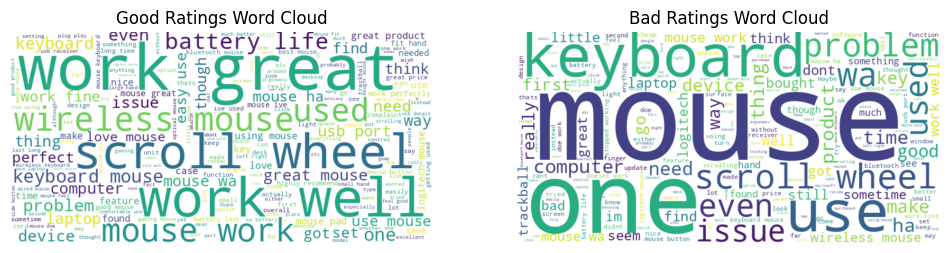

In [90]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Form Word Clouds for 'Good' and 'Bad' Ratings
good_reviews = Review_data[Review_data['overall'] >= 4]['reviewText'].str.cat(sep=' ')
bad_reviews = Review_data[Review_data['overall'] < 4]['reviewText'].str.cat(sep=' ')

good_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(good_reviews)
bad_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(bad_reviews)

# Plot Word Clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(good_wordcloud, interpolation='bilinear')
plt.title('Good Ratings Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bad_wordcloud, interpolation='bilinear')
plt.title('Bad Ratings Word Cloud')
plt.axis('off')

plt.show()

**Plot Pie Chart for Distribution of Ratings**

Use a relevant feature engineering technique to model review text as Bag of
Words model, TF-IDF, Hashing Vectorizer or Word2Vec.

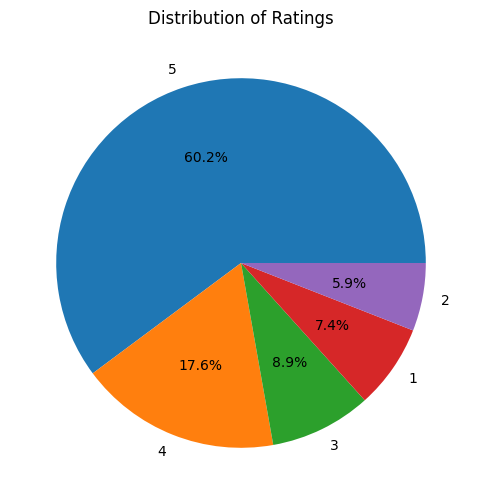

Year with maximum reviews: 2016
Year with the highest number of customers: 2016


In [91]:
ratings_distribution = df['overall'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(ratings_distribution, labels=ratings_distribution.index, autopct='%1.1f%%')
plt.title('Distribution of Ratings')
plt.show()

# Find the Year with Maximum Reviews
max_reviews_year = Review_data['reviewTime'].dt.year.value_counts().idxmax()
print("Year with maximum reviews:", max_reviews_year)

# Find the Year with the Highest Number of Customers
max_customers_year = Review_data.groupby(Review_data['reviewTime'].dt.year)['reviewerID'].nunique().idxmax()
print("Year with the highest number of customers:", max_customers_year)

In [92]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a copy of the DataFrame
Review_data_copy = Review_data.copy()

# Drop rows with missing or empty review text and overall columns
Review_data_copy.dropna(subset=['reviewText', 'overall'], inplace=True)
Review_data_copy = Review_data_copy[(Review_data_copy['reviewText'] != '') & (Review_data_copy['overall'] != '')]

# Convert 'overall' column to numeric
Review_data_copy.loc[:, 'overall'] = pd.to_numeric(Review_data_copy['overall'])

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed

# Fit and transform the review text
X = tfidf_vectorizer.fit_transform(Review_data_copy['reviewText'])

# Target variable
y = Review_data_copy['overall']


In [93]:
print(len(y))
print(len(Review_data['reviewText']))

151198
151378


** Convert Ratings to Rating Classes**

In [94]:
# Define a function to map ratings to rating classes
def map_rating_class(rating):
    if rating > 3:
        return 'Good'
    elif rating == 3:
        return 'Average'
    else:
        return 'Bad'

# Apply the function to create a new column 'Rating Class'
Review_data_copy['Rating Class'] = Review_data_copy['overall'].apply(map_rating_class)


** Split Data into Train and Test Sets**

In [95]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [96]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB

# Initialize classifiers
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),  # Increase max_iter
    'Linear SVC': LinearSVC(max_iter=1000),  # Increase max_iter
    'SGD Classifier': SGDClassifier(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier(),
    'Naive Bayes': MultinomialNB()
}

# Train and evaluate each model
for name, model in models.items():
    print(f"*** {name} ***")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("\n")


*** Logistic Regression ***
              precision    recall  f1-score   support

         1.0       0.54      0.55      0.55      2855
         2.0       0.35      0.16      0.22      2270
         3.0       0.40      0.21      0.27      3472
         4.0       0.46      0.25      0.33      6624
         5.0       0.75      0.94      0.83     22579

    accuracy                           0.68     37800
   macro avg       0.50      0.42      0.44     37800
weighted avg       0.62      0.68      0.63     37800



*** Linear SVC ***
              precision    recall  f1-score   support

         1.0       0.52      0.58      0.55      2855
         2.0       0.38      0.08      0.13      2270
         3.0       0.41      0.12      0.18      3472
         4.0       0.43      0.23      0.30      6624
         5.0       0.73      0.95      0.82     22579

    accuracy                           0.67     37800
   macro avg       0.50      0.39      0.40     37800
weighted avg       0.61     

**11. Collaborative Filtering :**

**Step 11a: Create a user-item rating matrix**

In [97]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8698 entries, 0 to 8697
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   category         8698 non-null   object 
 1   tech1            2364 non-null   object 
 2   description      8698 non-null   object 
 3   fit              0 non-null      float64
 4   title            8698 non-null   object 
 5   also_buy         8698 non-null   object 
 6   tech2            672 non-null    object 
 7   brand            8632 non-null   object 
 8   feature          8698 non-null   object 
 9   rank             8698 non-null   object 
 10  also_view        8698 non-null   object 
 11  main_cat         8674 non-null   object 
 12  similar_item     2402 non-null   object 
 13  date             8120 non-null   object 
 14  price            2360 non-null   object 
 15  asin             8698 non-null   object 
 16  imageURL         8698 non-null   object 
 17  imageURLHighRe

In [98]:
Review_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151198 entries, 0 to 151442
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   overall         151198 non-null  float64       
 1   verified        151198 non-null  bool          
 2   reviewTime      151198 non-null  datetime64[ns]
 3   reviewerID      151198 non-null  object        
 4   asin            151198 non-null  object        
 5   reviewerName    151198 non-null  object        
 6   reviewText      151198 non-null  object        
 7   summary         151198 non-null  object        
 8   unixReviewTime  151198 non-null  int64         
 9   vote            12142 non-null   object        
 10  style           77472 non-null   object        
 11  image           1884 non-null    object        
 12  year            151198 non-null  int32         
 13  Rating Class    151198 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(1)

In [99]:
ratings = Review_data_copy[['reviewerID', 'asin', 'overall', 'reviewTime']].copy()
ratings = ratings.rename(columns={'reviewerID': 'userId', 'asin': 'productId', 'overall': 'rating', 'reviewTime': 'timestamp'})



In [100]:
ratings

,userId,productId,rating,timestamp
0,AGO3EP72GI419,9803751263,4.0,2016-12-07
1,AP7M2KXPIYESM,9803751263,3.0,2016-10-10
2,A279EPILDCGV5T,9803751263,1.0,2016-09-09
3,AIGLYVT5UYXD8,9803751263,1.0,2016-06-25
4,A3MUW5YHOGREQU,9803751263,4.0,2017-12-06
...,...,...,...,...
151438,A1KZNVK8DYBLWB,B01HGK5MG8,5.0,2016-12-12
151439,A2FLDR1TEM8AK4,B01HGK5MG8,5.0,2016-11-25
151440,AV36BXF0Q5LDK,B01HHI04OE,4.0,2018-08-29
151441,A2BKUDOHGXBU8V,B01HHI04OE,1.0,2018-07-05


In [101]:
# Get the shape and size of the dataset
print("Number of rows    :",ratings.shape[0])
print("Number of columns :",ratings.shape[1])

Number of rows    : 151198
Number of columns : 4


In [102]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151198 entries, 0 to 151442
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     151198 non-null  object        
 1   productId  151198 non-null  object        
 2   rating     151198 non-null  float64       
 3   timestamp  151198 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 5.8+ MB


In [103]:
# Check for any Null values in the dataset
ratings.isnull().sum()

userId       0
productId    0
rating       0
timestamp    0
dtype: int64

In [104]:
# Get a dataframe consisting only of ratings that are duplicated
rating_combination = ['userId', 'productId']
ratings[ratings.duplicated(subset=rating_combination, keep=False)].sort_values(rating_combination).head()

# ratings.drop_duplicates(subset=['userId','productId','rating'],inplace=True)

,userId,productId,rating,timestamp
12796,A08761257GP04TJ0ROBS,B0010HE6LG,5.0,2014-08-01
14373,A08761257GP04TJ0ROBS,B0010HE6LG,5.0,2014-08-01
56398,A1049V38EMQL3B,B005HQ514C,5.0,2017-02-12
56541,A1049V38EMQL3B,B005HQ514C,5.0,2016-09-28
12652,A104F83PVACKQF,B0010HE6LG,1.0,2016-06-02


In [105]:
# Get the timespan of data
print("Minimum recorded ts:",ratings.timestamp.min())
print("Maximum recorded ts:",ratings.timestamp.max())

Minimum recorded ts: 1999-11-04 00:00:00
Maximum recorded ts: 2018-09-30 00:00:00


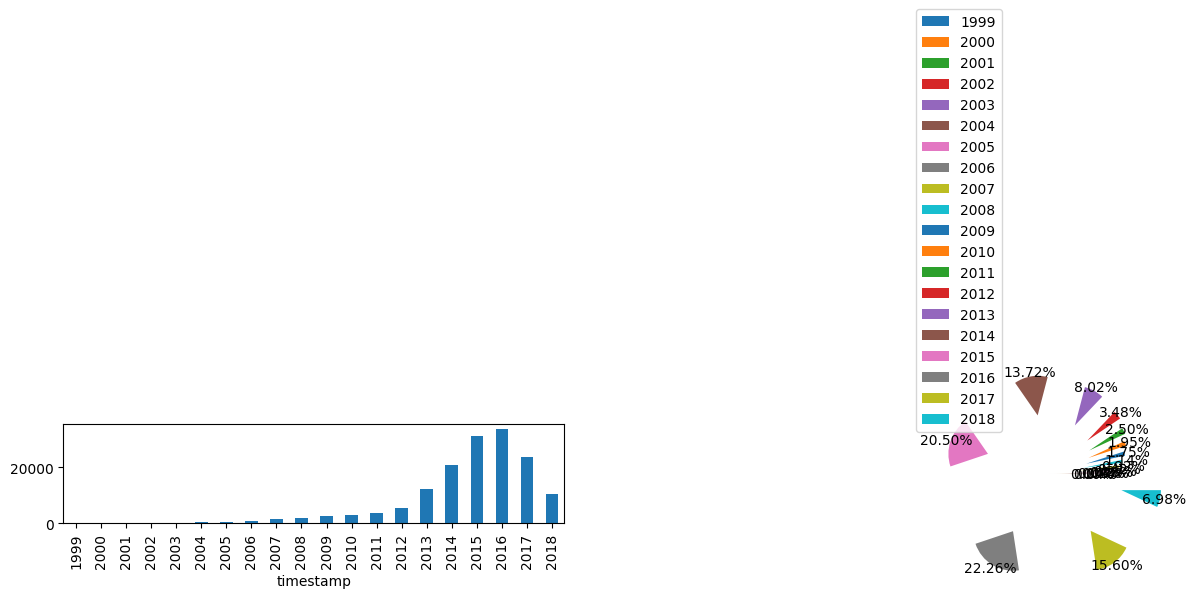

In [106]:
# Visualize the year wise ratings distribution
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot the bar chart
year_wise_count = ratings['timestamp'].dt.year.value_counts().sort_index()
_ = year_wise_count.plot(kind='bar', ax=ax[0])

# Define explode values based on the number of unique years
explode = tuple(0.1 * i for i in range(len(year_wise_count)))

# Plot the pie chart
_ = ax[1].pie(year_wise_count, explode=explode, autopct='%1.2f%%', pctdistance=1.1)
_ = ax[1].legend(labels=year_wise_count.index, bbox_to_anchor=(0.1, 0.85))

plt.tight_layout()
plt.show()


In [107]:
# Drop the timestamp column
ratings.drop(labels='timestamp', axis=1, inplace=True)
ratings.head()

,userId,productId,rating
0,AGO3EP72GI419,9803751263,4.0
1,AP7M2KXPIYESM,9803751263,3.0
2,A279EPILDCGV5T,9803751263,1.0
3,AIGLYVT5UYXD8,9803751263,1.0
4,A3MUW5YHOGREQU,9803751263,4.0


In [108]:
# Check the count of unique user and product data
unique_original = (ratings.userId.nunique(), ratings.productId.nunique())
print('Count of unique Users    :', unique_original[0])
print('Count of unique Products :', unique_original[1])

Count of unique Users    : 115096
Count of unique Products : 2272


In [109]:
# Find the minimum and maximum ratings
print("The Minimum rating is:",ratings.rating.min())
print("The Maximum rating is:",ratings.rating.max())

The Minimum rating is: 1.0
The Maximum rating is: 5.0


Count of observations in each rating:
rating
5.0    90960
4.0    26642
3.0    13431
1.0    11167
2.0     8998
Name: count, dtype: int64


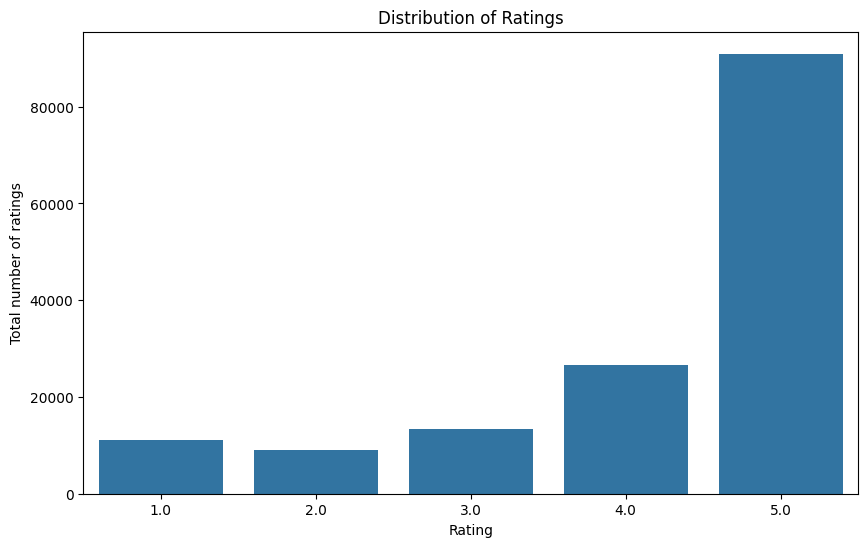

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the distribution of ratings
print('Count of observations in each rating:')
ratings_counts = ratings['rating'].value_counts()
print(ratings_counts)

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x="rating", data=ratings)
plt.xlabel('Rating')
plt.ylabel('Total number of ratings')
plt.title('Distribution of Ratings')
plt.show()


In [111]:
# Find the unique products under each ratings
ratings.groupby('rating')['productId'].nunique()

rating
1.0    1564
2.0    1429
3.0    1671
4.0    1964
5.0    2248
Name: productId, dtype: int64

In [112]:
# Find the top 10 users based on ratings
most_rated = ratings.userId.value_counts().rename_axis('UserId').reset_index(name='# ratings')
# most_rated = ratings.groupby('userId').size().sort_values(ascending=False)
most_rated.head(10)

,UserId,# ratings
0,ARBKYIVNYWK3C,20
1,A3R4794K2RVU1S,20
2,A2D1LPEUCTNT8X,17
3,A142HZY9SPCOLI,17
4,A2BMZRO0H7TFCS,16
5,A2O216BDOEIB4Z,16
6,A21HITB4V9WH6G,15
7,A1J75JJ0Q2OEJN,15
8,A680RUE1FDO8B,15
9,A37IRE9GZ0CZ7I,15


In [113]:
# Find the density of the rating matrix
print('Total observed ratings in the dataset  :', len(ratings))
possible_num_of_ratings = ratings.userId.nunique() * ratings.productId.nunique()
print('Total ratings possible for the dataset :', possible_num_of_ratings)
density = len(ratings) / possible_num_of_ratings * 100
print('Density of the dataset                 : {:4.5f}%'.format(density))

Total observed ratings in the dataset  : 151198
Total ratings possible for the dataset : 261498112
Density of the dataset                 : 0.05782%


In [114]:
# Drop the users who have rated less than 50 products
ratings = ratings[ratings.userId.isin(most_rated[most_rated['# ratings'] >= 5].UserId)]
print('# unique USERS who have rated 50 or more products :', ratings.userId.nunique())
print('# unique USERS dropped      :', unique_original[0] - ratings.userId.nunique())
print('# unique ITEMS remaining    :', ratings.productId.nunique())
print('# unique ITEMS dropped      :', unique_original[1] - ratings.productId.nunique())
print('\nFinal length of the dataset :', len(ratings))

# unique USERS who have rated 50 or more products : 753
# unique USERS dropped      : 114343
# unique ITEMS remaining    : 986
# unique ITEMS dropped      : 1286

Final length of the dataset : 4603


In [115]:
# Drop duplicate entries
ratings = ratings.drop_duplicates(['userId', 'productId'])

# Find the density of the final matrix
final_ratings_matrix = ratings.pivot(index='userId', columns='productId', values='rating').fillna(0)
print('Shape of final_ratings_matrix          :', final_ratings_matrix.shape)
print('Total observed ratings in the dataset  :', len(ratings))
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('Total ratings possible for the dataset :', possible_num_of_ratings)
density = len(ratings) / possible_num_of_ratings * 100
print('Density of the dataset                 : {:4.2f}%'.format(density))


Shape of final_ratings_matrix          : (753, 986)
Total observed ratings in the dataset  : 4224
Total ratings possible for the dataset : 742458
Density of the dataset                 : 0.57%


In [116]:
# Calculate the increase in density
print('The density of the user-item matrix increased by {:4.2f}%'.format((0.17-0.00039)/0.00039))

The density of the user-item matrix increased by 434.90%


In [117]:
from sklearn.model_selection import train_test_split

# Divide the dataset in 70:30 ratio
trainset, testset = train_test_split(ratings, test_size=0.3, random_state=5)
trainset.head()
testset.head()

,userId,productId,rating
20443,A2I60HCAVEF3RC,B001S4OTS6,5.0
40905,AJ2ICMO59T3H,B0043T7FXE,5.0
51378,A1RJ188P99HX1G,B005DSPLDA,1.0
125120,A9HHCFZ336D6Q,B011WBI4S0,5.0
20012,A3W4D8XOGLWUN5,B001QXDN0Y,4.0


In [118]:
print('Shape of the training set  :', trainset.shape)
print('Shape of the test set      :', testset.shape)


Shape of the training set  : (2956, 3)
Shape of the test set      : (1268, 3)


<Axes: title={'center': 'Testing Set'}, xlabel='rating', ylabel='count'>

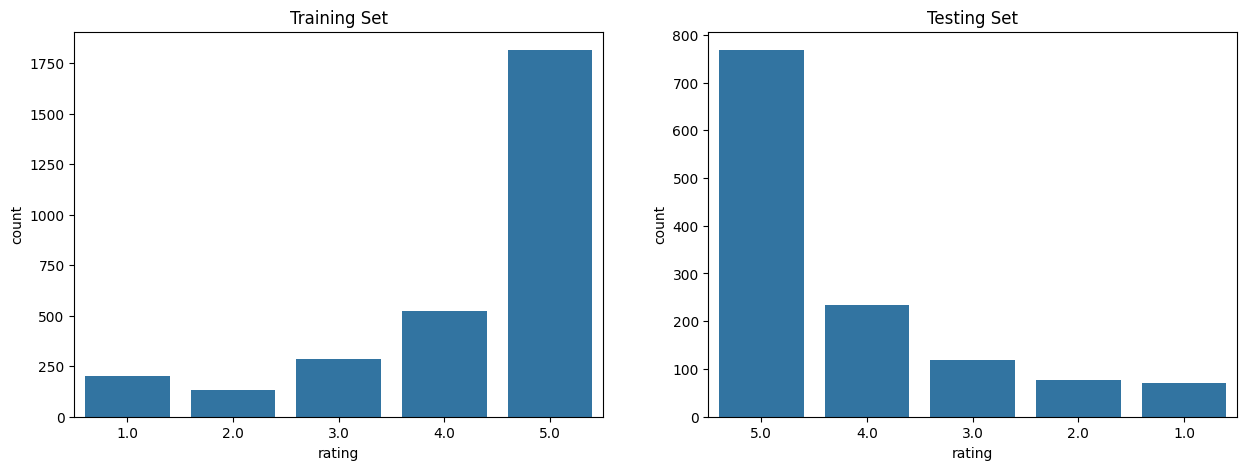

In [119]:
# Check the ratings distribution in both train and test set
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].set_title('Training Set')
sns.countplot(x='rating', data=trainset, ax=axes[0])
axes[1].set_title('Testing Set')
sns.countplot(x='rating', data=testset, ax=axes[1], order=testset.rating.value_counts().index)

In [120]:
# Create the User-Item sparse matrix
user_item = ratings.pivot(index='userId', columns='productId', values='rating').fillna(0)
print('Shape of User-Item sparse matrix:', user_item.shape)
user_item.head()

Shape of User-Item sparse matrix: (753, 986)


productId,9803751263,B00000J1V7,B00000K4LF,B00002JXBI,B00004S9AK,B00004W3YK,B0000511E5,B0000511L1,B000052WM4,B00005853X,...,B01G230V4S,B01GDCZJPE,B01GE5T59G,B01GI93F76,B01GOLXJBU,B01GOLXKMS,B01HBE71YA,B01HCPA7US,B01HEU1R82,B01HHI04OE
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10LWFKVC21F82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10O7THJ2O20AG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10SE0U42ABS9S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10Y058K7B96C6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
# Create the Item-User sparse matrix
item_user = ratings.pivot(index='productId', columns='userId', values='rating').fillna(0)
print('Shape of Item-User sparse matrix:', item_user.shape)
item_user.head()

Shape of Item-User sparse matrix: (986, 753)


userId,A100UD67AHFODS,A10LWFKVC21F82,A10O7THJ2O20AG,A10SE0U42ABS9S,A10Y058K7B96C6,A112PRKWERKR6,A118QJ00RJ5U4T,A11LIFTP3X8SVP,A11VIBM32L7BHG,A11X19IPS3OB72,...,AYP0YPLSP9ISM,AYT67DOBF4BR2,AYUPJWYH0MCWR,AZ34737QMSG8Q,AZD6H3IUO2BJJ,AZDWOETIRHIKC,AZITA4OVYFKW0,AZMY6E8B52L2T,AZR1RBKOE6XDN,AZTKJO0XZ45MQ
productId,,,,,,,,,,,,,,,,,,,,,
9803751263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000J1V7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000K4LF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00002JXBI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00004S9AK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the user-user similarity
user_similarity = cosine_similarity(user_item)
np.fill_diagonal(user_similarity, 0)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item.index, columns=user_item.index)
user_similarity_df.head()


userId,A100UD67AHFODS,A10LWFKVC21F82,A10O7THJ2O20AG,A10SE0U42ABS9S,A10Y058K7B96C6,A112PRKWERKR6,A118QJ00RJ5U4T,A11LIFTP3X8SVP,A11VIBM32L7BHG,A11X19IPS3OB72,...,AYP0YPLSP9ISM,AYT67DOBF4BR2,AYUPJWYH0MCWR,AZ34737QMSG8Q,AZD6H3IUO2BJJ,AZDWOETIRHIKC,AZITA4OVYFKW0,AZMY6E8B52L2T,AZR1RBKOE6XDN,AZTKJO0XZ45MQ
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.000000,0.0,0.638442,0.0,0.0,0.0,0.0,0.0,0.699379,0.781929,...,0.0,0.552907,0.0,0.475867,0.699379,0.0,0.875936,0.000000,0.709380,0.0
A10LWFKVC21F82,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
A10O7THJ2O20AG,0.638442,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.547723,0.612372,...,0.0,0.433013,0.0,0.372678,0.547723,0.0,0.685994,0.000000,0.555556,0.0
A10SE0U42ABS9S,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.184774,0.000000,0.0
A10Y058K7B96C6,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.172516,0.000000,0.0,0.000000,0.000000,0.000000,0.0


In [123]:
# Calculate the item-item similarity
item_similarity = cosine_similarity(item_user)
np.fill_diagonal(item_similarity, 0)
item_similarity_df = pd.DataFrame(item_similarity, index=item_user.index, columns=item_user.index)
item_similarity_df.head()

productId,9803751263,B00000J1V7,B00000K4LF,B00002JXBI,B00004S9AK,B00004W3YK,B0000511E5,B0000511L1,B000052WM4,B00005853X,...,B01G230V4S,B01GDCZJPE,B01GE5T59G,B01GI93F76,B01GOLXJBU,B01GOLXKMS,B01HBE71YA,B01HCPA7US,B01HEU1R82,B01HHI04OE
productId,,,,,,,,,,,,,,,,,,,,,
9803751263,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000J1V7,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000K4LF,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00002JXBI,0.0,0.0,0.0,0.000000,0.707107,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00004S9AK,0.0,0.0,0.0,0.707107,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
# Method to find top N neighbors
def find_n_neighbors(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(axis=1, func=lambda x: pd.Series(x.sort_values(ascending=False).iloc[:n].index,
                                                   index=['top{}'.format(i) for i in range(1, n+1)]))
    return df

In [125]:
# Find 10 neighbors of each user
user_10_neighbors = find_n_neighbors(user_similarity_df, 10)
user_10_neighbors.head(10)

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
userId,,,,,,,,,,
A100UD67AHFODS,A2LV94EL7ZQ4IQ,A2SSUJ17YC918U,A1RJ188P99HX1G,AKE8N4REE6S1C,A2M7X3GXTCOWZS,A2N81OFIN6JHGI,A3HRDDZYAGFSAE,A38ABQ043RCR2M,ACHCIR2S8OU52,A2RIIPYQH13A97
A10LWFKVC21F82,A34JSNIATH7EVW,A1EZHF7SMLDNE0,A2WBB8QN9S617,A159S51Y0DTZXU,A3JV071KO43Q5X,AWHSC677042I0,A2TKWMX4563NR6,A2X7NIOHY12Y6V,AC6LV5D2RKTIR,A2FCAKSWAG1P6C
A10O7THJ2O20AG,A3K8B1ZGCU2Z9S,A1IPGXMYY656T8,A3SCYPVBGW9ETU,A2RJK4198RFSI9,A2SSUJ17YC918U,A2LV94EL7ZQ4IQ,A1RJ188P99HX1G,A1A9ACJYC0WU6Y,A2B1BQYDQYOVXG,A3UBDVOL5UDIIB
A10SE0U42ABS9S,A3PFSYRUJ5XVG5,A2N8JXXVRGNRPQ,A9O6Z4I3G8MLC,A9VVXTX89G5QD,A3U1QIJ6MHBL73,AHS2LC09LMKJU,A680RUE1FDO8B,A1B1V5TGQT4MK6,A1VOFY3QFT9WCG,A3U41ZL33SS92P
A10Y058K7B96C6,A14JBDSWKPKTZA,A3H4TIVTTA5IBB,A3LZA698SQPCXE,AM0QLU79O05JR,A27DITPCCZIVAH,AGQ47IY7KG18W,AQROTS0HU1RDL,A2K9XFC31BCR5C,A1U2YHOESZHSAO,A2BMZRO0H7TFCS
A112PRKWERKR6,A29N9FVO6L2IGO,ARRAUVZFKAE7U,A23FZSJED02R5P,A2IA8B9134GBE,A32HSNCNPRUMTR,A3MMDEO32T3G26,ACYBPQJ2OFX0F,AOHX1OKENQSWI,A20OBC0TMHMPN0,A3UR2N0ATGBCU8
A118QJ00RJ5U4T,AGB80ES8V7MKV,A20NKFFN0H8A1G,AZDWOETIRHIKC,A17Y465UXZOJE3,A2URDI3YGYD1MS,A3FA16LX1ZEEIZ,A1FHUR5EMGA6XI,A1GEHPS7WRNFIA,A2FA2Z7Q915PD5,A2L26E1C7Y4LDZ
A11LIFTP3X8SVP,A1X8LZ1KO48SAK,A1RHJX6OA0O9KQ,A2XRMQA6PJ5ZJ8,A3ETBRTLC94NGQ,A1VLVWTLV3LVHR,A17O3GEK59KMKT,A166W9J6P3TULV,AKO7SEPXNBC3A,A1LSNQQ37FA5J9,A675F76W9W0MA
A11VIBM32L7BHG,A181BN2IOBH2IZ,AXZEN1SGB5347,A1RJ188P99HX1G,A2LV94EL7ZQ4IQ,A2SSUJ17YC918U,A2LK1YH7388AF2,A24I8GFSIY9K41,A3VGREGM1UDR57,A2W535XJRBXC53,A2W73W5OQ6HH9C


In [126]:
# Find 10 neighbors of each item
item_10_neighbors = find_n_neighbors(item_similarity_df, 10)
item_10_neighbors.head(10)

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
productId,,,,,,,,,,
9803751263,B00SWIYVUC,B005DSPLDA,B010MS67ZG,B011WBI4S0,B00KKFBRMK,B00KRDU2NU,B00KK92BJO,B00KV9BQUS,B00LJL4GQS,B00KVNY2KA
B00000J1V7,B00009WO6D,B000O3S0PK,B000G7WYZG,B000067SLZ,9803751263,B00KWUMU92,B00LAZ2BN8,B00L1Y11D4,B00KZGB01W,B00KVNY2KA
B00000K4LF,B000063EJW,B00006HMQY,B00025O7LQ,B00005T406,B00UNGSY8G,9803751263,B00KZGB01W,B00LJL4GQS,B00LAZ2BN8,B00L1Y11D4
B00002JXBI,B00005UKBX,B00005AT7Y,B00004S9AK,B00006HZ0L,B00006B7HB,9803751263,B00LPC3O3M,B00LJL4GQS,B00LAZ2BN8,B00L1Y11D4
B00004S9AK,B000066SAJ,B00002JXBI,B0000659A8,B00005UKBX,B00006B7HB,B0000AOWWM,B00005AT7Y,B00006HZ0L,B000TG4BA0,B00BZC31WQ
B00004W3YK,B00005AT7Y,B000ZH7E5M,B001VFUN82,B001DJ64C0,B00KZGB01W,B00LPC3O3M,B00LJL4GQS,B00LAZ2BN8,B00L1Y11D4,B00KW3OFG0
B0000511E5,B004TTWZSS,B00005ASFK,B00GX5XV16,B00FLXRN6U,B00MBB5CQS,B00LJL4GQS,B00KG5REIA,B00KK928LU,B00KK92BJO,B00KKFBRMK
B0000511L1,B00028OP2Y,B00ADBY97G,B001F42MKG,B00BP5KOPA,9803751263,B00KZGB01W,B00LPC3O3M,B00LJL4GQS,B00LAZ2BN8,B00L1Y11D4
B000052WM4,B005ZG0IME,B003JZCE7U,B00MN284T2,B000MKWM2W,B000AY5Y5W,B000TG4BA0,B00006HZ0L,B002QUZM0U,B001DJ64C0,B002KQ5KVG


Let's verify the similarity in both item and user base to find out if our calculatios are correct

In [127]:
def get_users_similar_products(user1, user2):
    common_products = ratings[ratings.userId == user1].merge(
    ratings[ratings.userId == user2],
    on = "productId",
    how = "inner" )
    return common_products[['rating_x', 'rating_y', 'productId']].head()

In [128]:
# Check the similarity of two users
get_users_similar_products('A100UD67AHFODS',	'A2LV94EL7ZQ4IQ')

,rating_x,rating_y,productId
0,5.0,4.0,B005DSPLDA
1,5.0,4.0,B010MS67ZG
2,5.0,4.0,B011WBI4S0


In [129]:
# Method to predict the rating
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #We use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [148]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import time  # Import the time module

# Function to predict ratings using User-Based Collaborative Filtering (UBCF)
def predict(ratings, similarity, type='user'):
    if type == 'user':
        pred = similarity.dot(ratings) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

# Example usage:
# Assuming 'user_item' is the user-item rating matrix and 'user_similarity' is the similarity matrix
# Calculate user-user similarity
user_similarity = cosine_similarity(user_item)
np.fill_diagonal(user_similarity, 0)

# Start measuring time
start_time = time.time()

# Predict ratings using UBCF
user_prediction = predict(user_item, user_similarity, type='user')
user_prediction_df = pd.DataFrame(user_prediction, index=user_item.index, columns=user_item.columns)

# Calculate the elapsed time
elapsed_time = time.time() - start_time
print(f"Time taken: {elapsed_time:.2f} seconds")

# Print the head of the predicted ratings DataFrame
print(user_prediction_df.head())


Time taken: 0.07 seconds
productId       9803751263  B00000J1V7  B00000K4LF  B00002JXBI  B00004S9AK  \
userId                                                                       
A100UD67AHFODS    0.016116    0.000000         0.0         0.0    0.000000   
A10LWFKVC21F82    0.000000    0.121039         0.0         0.0    0.000000   
A10O7THJ2O20AG    0.015980    0.000000         0.0         0.0    0.000000   
A10SE0U42ABS9S    0.000000    0.000000         0.0         0.0    0.000000   
A10Y058K7B96C6    0.000000    0.000000         0.0         0.0    0.051663   

productId       B00004W3YK  B0000511E5  B0000511L1  B000052WM4  B00005853X  \
userId                                                                       
A100UD67AHFODS         0.0         0.0         0.0    0.000000    0.002227   
A10LWFKVC21F82         0.0         0.0         0.0    0.034372    0.000000   
A10O7THJ2O20AG         0.0         0.0         0.0    0.000000    0.000000   
A10SE0U42ABS9S         0.0         0.0

<ipython-input-148-3a9b61865e58>:9: RuntimeWarning: invalid value encountered in divide
  pred = similarity.dot(ratings) / np.array([np.abs(similarity).sum(axis=1)]).T


In [149]:
# Method to Recommend the items with the highest predicted ratings
def recommend_items(userId, orig_df, preds_df, top_n):
    # Get and sort the user's ratings
    sorted_user_ratings = orig_df.loc[userId].sort_values(ascending=False) #sorted_user_ratings
    sorted_user_predictions = preds_df.loc[userId].sort_values(ascending=False) #sorted_user_predictions

    # Prepare recommendations
    recommedations = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    recommedations.index.name = 'Recommended Items'
    recommedations.columns = ['user_ratings', 'user_predictions']

    # Take the products which user has NOT rated
    recommedations = recommedations.loc[recommedations.user_ratings == 0]
    recommedations = recommedations.sort_values('user_predictions', ascending=False)
    return recommedations.head(top_n)

In [153]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import time

# Function to predict ratings using User-Based Collaborative Filtering (UBCF)
def predict(ratings, similarity, type='user'):
    if type == 'user':
        pred = similarity.dot(ratings) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

# Function to recommend items for a given user
def recommend_items(userId, orig_df, preds_df, top_n):
    # Convert the predictions array to DataFrame
    preds_df = pd.DataFrame(preds_df, index=orig_df.index, columns=orig_df.columns)

    # Get and sort the user's ratings
    sorted_user_ratings = orig_df.loc[userId].sort_values(ascending=False)
    sorted_user_predictions = preds_df.loc[userId].sort_values(ascending=False)

    # Prepare recommendations
    recommendations = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    recommendations.columns = ['Actual Rating', 'Predicted Rating']
    recommendations = recommendations.loc[recommendations['Actual Rating'] == 0]  # Filter out items already rated by the user
    recommendations = recommendations.sort_values('Predicted Rating', ascending=False)

    # Print top N recommendations
    print(recommendations.head(top_n))

# Example usage:
# Assuming 'user_item' is the user-item rating matrix and 'user_similarity' is the similarity matrix
# Calculate user-user similarity
user_similarity = cosine_similarity(user_item)
np.fill_diagonal(user_similarity, 0)

# Predict ratings using UBCF
user_prediction = predict(user_item, user_similarity, type='user')

# Find recommendations for users
find_recom = {'A100UD67AHFODS': 10,
              'A2LV94EL7ZQ4IQ': 10,
              'A2SSUJ17YC918U': 10}   # This dictionary contains user IDs and top N recommendation counts

for user in find_recom:
    print("Top %d recommendations for the userId: %s" %(find_recom[user],user))
    recommend_items(user, user_item, user_prediction, find_recom[user])
    print("\n")


Top 10 recommendations for the userId: A100UD67AHFODS
            Actual Rating  Predicted Rating
productId                                  
B01GI93F76            0.0          0.662242
B01FM3G9TU            0.0          0.662242
B005HQ514C            0.0          0.591768
B00ADBY98A            0.0          0.199395
B004XIOJ7A            0.0          0.197432
B01FM3G4T0            0.0          0.180963
B0043T7FXE            0.0          0.138709
B006JRIDHK            0.0          0.116175
B005KSAG3S            0.0          0.114439
B005DSPLCQ            0.0          0.113827


Top 10 recommendations for the userId: A2LV94EL7ZQ4IQ
            Actual Rating  Predicted Rating
productId                                  
B01GI93F76            0.0          0.682155
B01FM3G9TU            0.0          0.682155
B005HQ514C            0.0          0.609420
B00ADBY98A            0.0          0.205793
B004XIOJ7A            0.0          0.194692
B01FM3G4T0            0.0          0.185701
B0038KTBRW

<ipython-input-153-d4b9ca01a539>:9: RuntimeWarning: invalid value encountered in divide
  pred = similarity.dot(ratings) / np.array([np.abs(similarity).sum(axis=1)]).T


a) Create a user-item rating matrix
b) Normalize the ratings, by using min-max scaling on user’s reviews
c) Create a user-user recommender system - i.e,
i) Find the top N similar users, by using cosine similarity. N = 10, 20, 30,
40, 50
ii) Use K-folds validation. K = 5. Explanation: Create 5 subsets, and take 1
of them as the validation set. Take the rest 4 to be the training set.
iii) Use the training set to predict the missing values, and use the validation
set to calculate the error. (Error = |actual_rating - predicted_rating|)


In [158]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the user-user similarity matrix
user_similarity_matrix = cosine_similarity(user_item)

# Method to find top N similar users
def top_n_similar_users(similarity_matrix, n):
    similar_users = np.argsort(-similarity_matrix, axis=1)[:, 1:n+1]
    return similar_users

# Specify N values
N_values = [10, 20, 30, 40, 50]

# Dictionary to store top N similar users for each N
top_similar_users_dict = {}
for N in N_values:
    top_similar_users_dict[N] = top_n_similar_users(user_similarity_matrix, N)

In [159]:
from sklearn.model_selection import KFold

# Specify number of folds
K = 5

# Initialize KFold
kf = KFold(n_splits=K)

# Convert user_item DataFrame to NumPy array
user_item_array = user_item.values

# Split the data into K folds
for train_index, test_index in kf.split(user_item_array):
    train_set, test_set = user_item_array[train_index], user_item_array[test_index]

In [160]:
from sklearn.metrics import mean_absolute_error

def predict_ratings(train_matrix, test_matrix, similarity_matrix, similar_users):
    predicted_matrix = np.zeros_like(test_matrix)
    for i in range(len(test_matrix)):
        for j in range(len(test_matrix[i])):
            if test_matrix[i][j] == 0:  # Only predict for missing values
                if i < len(similar_users) and similar_users[i].any():  # Ensure similar_users is not empty
                    user_index = similar_users[i][0] if similar_users[i][0] < len(train_matrix) else 0  # Adjust user index
                    numerator = np.sum(train_matrix[user_index, j] * similarity_matrix[i][user_index])
                    denominator = np.sum(np.abs(similarity_matrix[i][user_index]))
                    if denominator != 0:
                        predicted_matrix[i][j] = numerator / denominator
    return predicted_matrix

# Calculate predicted ratings for each fold
predicted_ratings = []
user_item_array = user_item.values

# Split the data into K folds
for train_index, test_index in kf.split(user_item_array):
    train_set, test_set = user_item_array[train_index], user_item_array[test_index]
    similarity_matrix = cosine_similarity(train_set)
    similar_users = top_similar_users_dict[10]  # Choose N as per requirement
    predicted_matrix = predict_ratings(train_set, test_set, similarity_matrix, similar_users)

    # Pad the predicted ratings matrix to ensure uniform shape
    max_shape = max(predicted_matrix.shape)
    padded_matrix = np.pad(predicted_matrix, ((0, max_shape - predicted_matrix.shape[0]), (0, max_shape - predicted_matrix.shape[1])), mode='constant')

    predicted_ratings.append(padded_matrix)

# Convert list of predicted ratings arrays to numpy array
predicted_ratings = np.array(predicted_ratings)

# Calculate error for each fold
errors = []
for i in range(len(predicted_ratings)):
    test_fold_shape = test_set.shape  # Fix here
    predicted_fold_shape = predicted_ratings[i].shape
    # Slice the predicted ratings array to match the shape of the test set
    predicted_fold = predicted_ratings[i][:test_fold_shape[0], :test_fold_shape[1]]  # Fix here
    error = np.abs(test_set - predicted_fold)  # Fix here
    errors.append(error)

# Convert list of errors arrays to numpy array
errors = np.array(errors)

# Calculate Mean Absolute Error (MAE) for each fold
mae_values = np.mean(errors, axis=(1,2))

iv) Report the MAE (Mean Absolute Error) for taking K = 10, 20, 30, 40,
50 similar users.


In [161]:
# Print Mean Absolute Error (MAE) for each fold
for fold, mae in enumerate(mae_values):
    print(f"Fold {fold + 1} MAE: {mae}")

# Calculate the average MAE across all folds
average_mae = np.mean(mae_values)
print(f"\nAverage MAE across all folds: {average_mae}")

Fold 1 MAE: 0.02658553076402975
Fold 2 MAE: 0.02816768086544963
Fold 3 MAE: 0.030324543610547667
Fold 4 MAE: 0.032616632860040566
Fold 5 MAE: 0.038424611223799865

Average MAE across all folds: 0.031223799864773492


d) Create an item-item recommender system. Use the same steps as above.
e) Plot separate graphs for each of the two recommender systems, plotting
MAE against K

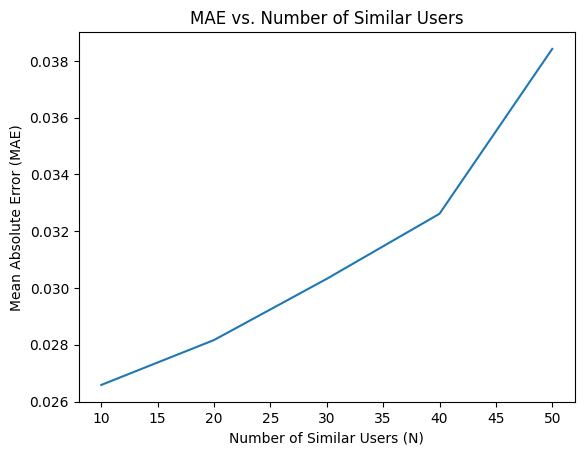

In [162]:
import matplotlib.pyplot as plt

# Visualize the MAE values
plt.plot([10, 20, 30, 40, 50], mae_values)
plt.xlabel('Number of Similar Users (N)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs. Number of Similar Users')
plt.show()

**12.Also, report the TOP 10 products by User Sum Ratings.**

In [163]:
# Sum the ratings for each product across all users
product_sum_ratings = user_item.sum(axis=0)

# Sort the products based on their sum ratings in descending order
top_products = product_sum_ratings.sort_values(ascending=False)

# Get the top 10 products
top_10_products = top_products.head(10)

# Print the top 10 products by user sum ratings
print("Top 10 Products by User Sum Ratings:")
for rank, (product_id, sum_rating) in enumerate(top_10_products.items(), 1):
    print(f"{rank}. Product ID: {product_id}, Sum Rating: {sum_rating}")

Top 10 Products by User Sum Ratings:
1. Product ID: B010MS67ZG, Sum Rating: 1194.0
2. Product ID: B011WBI4S0, Sum Rating: 1194.0
3. Product ID: B005DSPLDA, Sum Rating: 979.0
4. Product ID: B01GI93F76, Sum Rating: 486.0
5. Product ID: B01FM3G9TU, Sum Rating: 482.0
6. Product ID: B005HQ514C, Sum Rating: 456.0
7. Product ID: B0043T7FXE, Sum Rating: 227.0
8. Product ID: B00BP5KOPA, Sum Rating: 218.0
9. Product ID: B002HWRJBM, Sum Rating: 214.0
10. Product ID: B004XIOJ7A, Sum Rating: 175.0
